## mmseg tutorial

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1' # nvidia-smi로 비어있는 gpu 확인하고 여기서 선택할것!

In [1]:
import cv2


In [2]:
mask = cv2.cvtColor(cv2.imread("../split_data_224_trash/train_mask/0_7.png"), cv2.COLOR_BGR2RGB)
for i in mask:
    for j in i:
        print(j)

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]


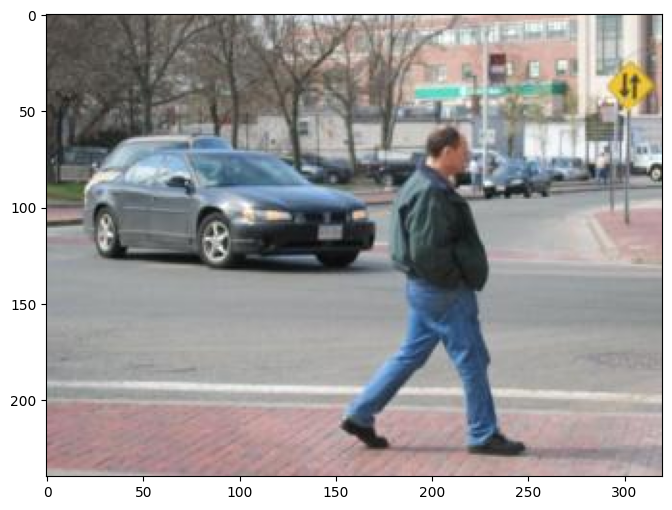

In [4]:
# Let's take a look at the dataset
import mmcv
import mmengine
import matplotlib.pyplot as plt


img = mmcv.imread('iccv09Data/images/6000124.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [5]:
# define dataset root and directory for images and annotations
data_root = '../split_data_224_trash'
img_dir = 'train_img'
ann_dir = 'train_mask'
# define class and palette for better visualization
classes = ('background', 'building')
palette = [[0,0,0], [1, 1, 1]]

In [6]:
import os.path as osp
import numpy as np
from PIL import Image

# # convert dataset annotation to semantic segmentation map
# for file in mmengine.scandir(osp.join(data_root, ann_dir), suffix='.regions.txt'):
#   seg_map = np.loadtxt(osp.join(data_root, ann_dir, file)).astype(np.uint8)
#   seg_img = Image.fromarray(seg_map).convert('P')
#   seg_img.putpalette(np.array(palette, dtype=np.uint8))
#   seg_img.save(osp.join(data_root, ann_dir, file.replace('.regions.txt', 
#                                                          '.png')))

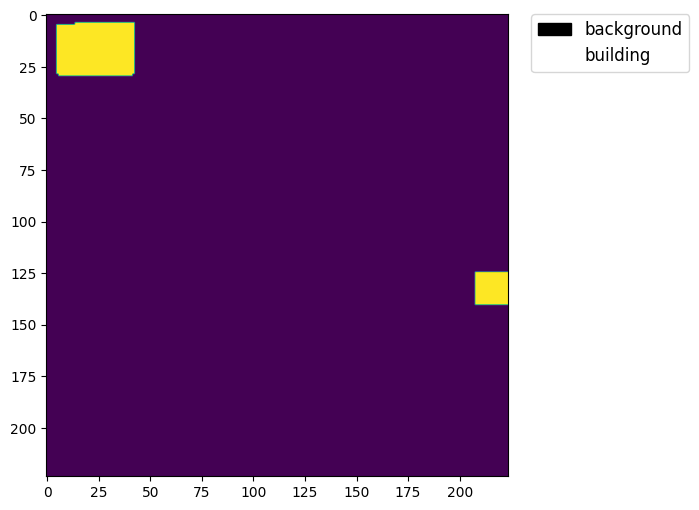

<PIL.PngImagePlugin.PngImageFile image mode=L size=224x224 at 0x7FDFD4B09590>


In [7]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches

img = Image.open('../split_data_224_trash/train_mask/0_7.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('L')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/1., 
                          label=classes[i]) for i in range(2)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

print(img)

In [8]:
# # split train/val set randomly
# split_dir = 'splits'
# mmengine.mkdir_or_exist(osp.join(data_root, split_dir))
# filename_list = [osp.splitext(filename)[0] for filename in mmengine.scandir(
#     osp.join(data_root, ann_dir), suffix='.png')]
# with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
#   # select first 4/5 as train set
#   train_length = int(len(filename_list)*4/5)
#   f.writelines(line + '\n' for line in filename_list[:train_length])
# with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
#   # select last 1/5 as train set
#   f.writelines(line + '\n' for line in filename_list[train_length:])

KeyboardInterrupt: 

In [9]:
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset


@DATASETS.register_module()
class TV2Dataset(BaseSegDataset):
  METAINFO = dict(classes = classes, palette = palette)
  def __init__(self, **kwargs):
    super().__init__(img_suffix='.png', seg_map_suffix='.png', **kwargs)

In [10]:
from mmengine import Config
cfg = Config.fromfile('./mmsegmentation/configs/mask2former/mask2former_r50_8xb2-90k_cityscapes-512x1024.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0),
    dist_cfg=dict(backend='nccl'))
vis_backends = [
    dict(type='LocalVisBackend'),
]
visualizer = dict(
    type='SegLocalVisualizer',
    vis_backends=[
        dict(type='LocalVisBackend'),
    ],
    name='visualizer')
log_processor = dict(by_epoch=False)
log_level = 'INFO'
load_from = None
resume = False
tta_model = dict(type='SegTTAModel')
dataset_type = 'CityscapesDataset'
data_root = 'data/cityscapes/'
crop_size = (
    512,
    1024,
)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(
        type='RandomChoiceResize',
        scales=[
            512,
            614,
            716,
            819,
            921,
            1024,
            1126,
            1228,
            1331,
            1433,
            1536,
            1638,
            1740,
            1843,
            19

In [11]:
# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.crop_size = (224, 224)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
#cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 2
#cfg.model.auxiliary_head.num_classes = 2

# Modify dataset type and path
cfg.dataset_type = 'TV2Dataset'
cfg.data_root = data_root

cfg.train_dataloader.batch_size = 8

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    #dict(type='RandomResize', scale=(224, 224), ratio_range=(0.5, 2.0), keep_ratio=True),
    #dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    #dict(type='Resize', scale=(320, 240), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]


cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader


# Load the pretrained weights
cfg.load_from = './iccv09Data/mask2former_r50_8xb2-90k_cityscapes-512x1024_20221202_140802-ffd9d750.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = 200
cfg.train_cfg.val_interval = 200
cfg.default_hooks.logger.interval = 10
cfg.default_hooks.checkpoint.interval = 200

# Set seed to facilitate reproducing the result
cfg['randomness'] = dict(seed=0)
cfg.num_classes = 2
cfg.model.decode_head.loss_cls.class_weight = [1.0,1.0]
# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0),
    dist_cfg=dict(backend='nccl'))
vis_backends = [
    dict(type='LocalVisBackend'),
]
visualizer = dict(
    type='SegLocalVisualizer',
    vis_backends=[
        dict(type='LocalVisBackend'),
    ],
    name='visualizer')
log_processor = dict(by_epoch=False)
log_level = 'INFO'
load_from = './iccv09Data/mask2former_r50_8xb2-90k_cityscapes-512x1024_20221202_140802-ffd9d750.pth'
resume = False
tta_model = dict(type='SegTTAModel')
dataset_type = 'TV2Dataset'
data_root = '../split_data_224_trash'
crop_size = (
    224,
    224,
)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs'),
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs'),
]
img_ratios = [
    0.5,
    0.75,
    1.0,
  

In [12]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)

07/17 10:07:31 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.6 (default, Jan  8 2020, 19:59:22) [GCC 7.3.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.2, V11.2.152
    GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.12.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-ge

/home/leadawon5/dawon/vision/dacon/dacondawon/mmseg/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [13]:
# start training
runner.train()

07/17 10:08:00 - mmengine - INFO - paramwise_options -- backbone.conv1.weight:lr=1e-05
07/17 10:08:00 - mmengine - INFO - paramwise_options -- backbone.conv1.weight:weight_decay=0.05
07/17 10:08:00 - mmengine - INFO - paramwise_options -- backbone.conv1.weight:lr_mult=0.1
07/17 10:08:00 - mmengine - INFO - paramwise_options -- backbone.conv1.weight:decay_mult=1.0
07/17 10:08:00 - mmengine - INFO - paramwise_options -- backbone.bn1.weight:lr=1e-05
07/17 10:08:00 - mmengine - INFO - paramwise_options -- backbone.bn1.weight:weight_decay=0.05
07/17 10:08:00 - mmengine - INFO - paramwise_options -- backbone.bn1.weight:lr_mult=0.1
07/17 10:08:00 - mmengine - INFO - paramwise_options -- backbone.bn1.weight:decay_mult=1.0
07/17 10:08:00 - mmengine - INFO - paramwise_options -- backbone.bn1.bias:lr=1e-05
07/17 10:08:00 - mmengine - INFO - paramwise_options -- backbone.bn1.bias:weight_decay=0.05
07/17 10:08:00 - mmengine - INFO - paramwise_options -- backbone.bn1.bias:lr_mult=0.1
07/17 10:08:00 

/home/leadawon5/dawon/bsvenv/lib/python3.7/site-packages/mmdet/models/layers/positional_encoding.py:84: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature**(2 * (dim_t // 2) / self.num_feats)
/home/leadawon5/dawon/bsvenv/lib/python3.7/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
../aten/src/ATen/native/cuda/IndexKernel.cu:91: operator(): block: [1,0,0], thread: [64,0,0] Assertion `index >= -sizes[i] && 

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_200.pth
torch.Size([2, 224, 224])


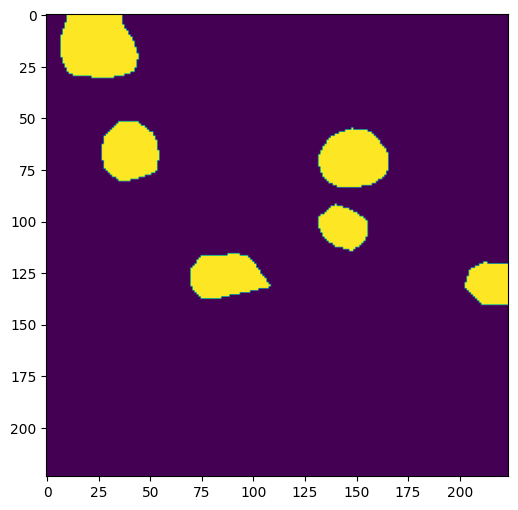

In [ ]:
from mmseg.apis import init_model, inference_model, show_result_pyplot
import torch
# Init the model from the config and the checkpoint
checkpoint_path = './work_dirs/tutorial/iter_200.pth'
#checkpoint_path = "./iccv09Data/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth"
cuda_num = 1
model = init_model(cfg, checkpoint_path, f'cuda:{cuda_num}')

img = mmcv.imread('../split_data_224_trash/train_img/0_7.png')
result = inference_model(model, img)
#print(result.seg_logits.data)
masks = torch.sigmoid(result.seg_logits.data[1]).cpu().numpy()
print(result.seg_logits.data.shape)

masks = (masks > 0.40).astype(np.uint8)
plt.figure(figsize=(8, 6))
plt.imshow(masks)
plt.show()

## custom cells

In [ ]:
# import cv2
import pandas as pd
# import numpy as np

import torch
# import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms

from tqdm import tqdm
# import albumentations as A
# from albumentations.pytorch import ToTensorV2

# #import segmentation_models_pytorch as smp
# import matplotlib.pyplot as plt
# from IPython.display import clear_output 
# import time
import json


# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# #device = torch.device('cpu')
# print(device)

In [29]:
# RLE 디코딩 함수
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

# RLE 인코딩 함수
def rle_encode(mask):
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [30]:
class TestpathDataset(Dataset):
    def __init__(self, csv_file, transform=None, infer=False):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.infer = infer
        print("full dataset size : ",len(self.data))
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        #img_path = self.data.iloc[idx, 1]    # default : ./train_img/TRAIN_0000.png
        img_path = "../data"+self.data.iloc[idx, 1][1:]
        
        return img_path

In [31]:
test_ds = TestpathDataset(csv_file='../data/test.csv', infer=True)

full dataset size :  60640


## huggingface cells

In [38]:
from mmseg.apis import init_model, inference_model

# Init the model from the config and the checkpoint
checkpoint_path = './work_dirs/tutorial/iter_200.pth'
#checkpoint_path = "./iccv09Data/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth"
cuda_num = 0
model = init_model(cfg, checkpoint_path, f'cuda:{cuda_num}')
results = []
for i in tqdm(range(len(test_ds))):
    img = mmcv.imread(test_ds[i])
    result = inference_model(model, img)
    masks = torch.sigmoid(result.seg_logits.data[1]).cpu().numpy()
    masks = (masks > 0.40).astype(np.uint8)
    mask_rle = rle_encode(masks)
    if mask_rle == '': # 예측된 건물 픽셀이 아예 없는 경우 -1
        results.append(-1)
    else:
        results.append(mask_rle)

/home/leadawon5/dawon/vision/dacon/dacondawon/mmseg/mmsegmentation/mmseg/models/decode_heads/decode_head.py:120: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert `seg_logits` into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/home/leadawon5/dawon/vision/dacon/dacondawon/mmseg/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/leadawon5/dawon/vision/dacon/dacondawon/mmseg/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore``

Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_200.pth


  0%|          | 0/60640 [00:00<?, ?it/s]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


AssertionError: 

In [35]:
submit = pd.read_csv('../data/sample_submission.csv')
submit['mask_rle'] = results

In [37]:
print(submit.head)

<bound method NDFrame.head of            img_id                                           mask_rle
0      TEST_00000  <SegDataSample(\n\n    META INFORMATION\n    o...
1      TEST_00001  <SegDataSample(\n\n    META INFORMATION\n    o...
2      TEST_00002  <SegDataSample(\n\n    META INFORMATION\n    o...
3      TEST_00003  <SegDataSample(\n\n    META INFORMATION\n    o...
4      TEST_00004  <SegDataSample(\n\n    META INFORMATION\n    o...
...           ...                                                ...
60635  TEST_60635  <SegDataSample(\n\n    META INFORMATION\n    o...
60636  TEST_60636  <SegDataSample(\n\n    META INFORMATION\n    o...
60637  TEST_60637  <SegDataSample(\n\n    META INFORMATION\n    o...
60638  TEST_60638  <SegDataSample(\n\n    META INFORMATION\n    o...
60639  TEST_60639  <SegDataSample(\n\n    META INFORMATION\n    o...

[60640 rows x 2 columns]>


In [36]:
submit.to_csv('./submit/psp_040.csv', index=False)

KeyboardInterrupt: 